In [1]:
 #!/usr/bin/env python -W ignore::DeprecationWarning
import os
import sys

root_path = os.getcwd()
parent_path = os.path.dirname(root_path)

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from matplotlib import cm
from matplotlib import colors
import math

In [3]:
def gen_plot(x):
    plot = plt.plot(x)
    return plot

In [4]:
import random

random.uniform(0, 1)

tbig = np.array([random.uniform(-20, 20) for i in range(150)])
rbig = np.array([random.uniform(0, 1) for i in range(150)])


t = [0, 1, 2, 2, 3, 2, 2, 1, 1, 3, 0]
r = [.9, .1, .2, .8, .888, .122, .256, .121, .976, .012, .777]

In [5]:
### GET cmaps
 # brauch eigentlich dunkleres rot
cmap = plt.get_cmap('Reds')

# from matplotlib import cm # mal gucken was es da noch so gibt
# cm.coolwarm

<ipython-input-6-4c55ac07dacc>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout(pad=3.0) # padding in bewteen nice


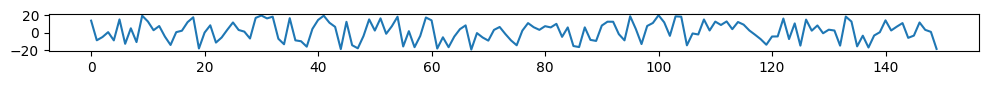

In [6]:
### PLOTS

# figure
# fig = plt.figure()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, .5), dpi=100) # Create a figure and a set of subplots.
# fig = plt.figure() # Create a new figure, or activate an existing figure.

fig.tight_layout(pad=3.0) # padding in bewteen nice

# print(ax.shape)
# print(tbig.shape)

cmap = plt.get_cmap('Reds')
cNorm = colors.Normalize(vmin=rbig.min(), vmax=rbig.max())
scalarmap = cm.ScalarMappable(norm=cNorm, cmap=cmap)

# plt.pcolormesh([rbig], cmap='Reds')

rbig_colors = [cmap(rbig[i]) for i in range(rbig.shape[0])]

# for i in range(ax.shape[0]):
#     for j in range(tbig.shape[0]):
#         ax[i].axvline(j, color=rbig_colors[j], alpha=.9, linewidth=3.6)
#     ax[i].pcolormesh([rbig], alpha=.8, cmap='Reds')
#     x[i].pcolor([rbig], cmap='Reds')
#     ax[i].plot(tbig)


# ax.axvline(j, color=rbig_colors[j], alpha=.9, linewidth=3.6)
ax.plot(tbig)

    #ax[i].set_xlim(0, 11) # kann man machen
    #axs[i].set_xlabel('time') # standard
    #axs[i].set_ylabel('s1 and s2') # standard
    # ax[i].grid(True) # schauen ob ichs brauch
    
# ax[2].plot(rbig)
# ax[0].set(facecolor='red') 
    
# fig.tight_layout() # kinda looks nice, kann man aber auch weglassen
# plt.axis('scaled') # fucks up the plot



plt.show()

In [7]:
def plot_relevance(timeseries, relevance, figsize=(15, 1), alpha=.9, linewidth=3.6, colormap='Reds', 
        show=True, save=False, output_dir=None, file_name=None):
    cmap = plt.get_cmap(colormap)
    
    timeseries_in = np.array(timeseries)
    relevance_in = np.array(relevance)
    
    if timeseries_in.shape != relevance_in.shape:
        raise Exception('Time series and relevance are not the same shape')
    
    if type(timeseries_in.tolist())!=list and type(relevance_in.tolist())!=list:
        timeseries_in = np.array([timeseries])
        relevance_in = np.array([relevance])
        
    if len(timeseries_in.shape) == 1:
        len_ts = 1
        fig, ax = plt.subplots(nrows=len_ts, ncols=1, figsize=figsize)
        ax.pcolormesh([relevance_in for i in range(math.ceil(timeseries_in.max()))], cmap='Reds')
        ax.plot(timeseries_in)
    else:
        len_ts = timeseries_in.shape[0]
        new_figsize = (15*.815, len_ts*1.15)            
        fig, ax = plt.subplots(nrows=len_ts, ncols=1, figsize=new_figsize)
        fig.tight_layout(pad=.6)
        for i in range(len_ts):
            ax[i].plot(timeseries_in[i])
            ax[i].pcolormesh([relevance_in[i] for idx in range(math.ceil(timeseries_in[i].max()))], cmap='Reds')
    
    if show:
        plt.show()
    if output_dir and save:
        if file_name:
            save_pig(output_dir+'/'+file_name+'_explanation.png')
        else:
            save_pig(output_dir+'/explanation.png')
    

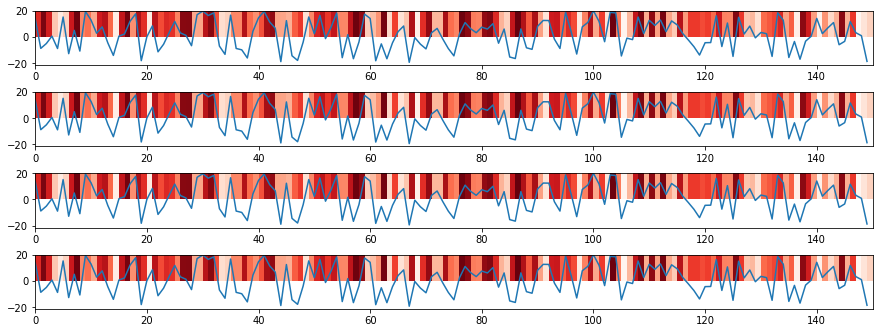

In [8]:
plot_relevance([tbig, tbig, tbig, tbig], [rbig, rbig, rbig, rbig])
# plot_relevance(tbig, rbig)

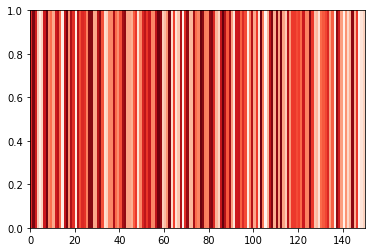

In [9]:
plt.pcolormesh([rbig], cmap='Reds')

In [10]:
np.linspace(0, 10, 10)Z = np.random.rand(25, 25)
     
plt.pcolormesh(Z)

SyntaxError: invalid syntax (<ipython-input-10-fddb98e2cbb2>, line 1)

In [ ]:
axes.Axes.pcolormesh(rbig, cmap='Reds')

In [ ]:
Z = np.random.rand(2, 4)

# Z = [[]]
     
plt.pcolormesh(Z)

In [ ]:
Z

In [ ]:
Z = np.random.rand(6, 10)

fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(Z)
ax0.set_title('default: no edges')

c = ax1.pcolor(Z, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

In [ ]:
Z

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
# make these smaller to increase the resolution
dx, dy = 1, 1

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[-2:2+dy:dy, 0:10+dx:dx]
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -abs(z).max(), abs(z).max()

# x # array-like, The coordinates of the corners of quadrilaterals of a pcolormesh:
# y # array-like, The coordinates of the corners of quadrilaterals of a pcolormesh:
# z # 2D array-like The color-mapped values.

# z_min # vmin, #The colorbar range
# z_max # vmax, #It automatically determines min max values of z 

print('x', np.array(x).shape)
print(x)
print('y', np.array(y).shape)
print(y)
print('z', np.array(z).shape)
print(z)
print()
print('z_min', z_min)
print('z_max', z_max)


fig, axs = plt.subplots(1)
ax = axs

# x coordinates, y coordinates, z values 
c = ax.pcolor(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolor')
fig.colorbar(c, ax=ax)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
from matplotlib import cm

interp = 'nearest'

# Linear x array for cell centers:
x = np.linspace(-4, 4, 9)

# Highly nonlinear x array:
x2 = x**3

y = np.linspace(-4, 4, 9)

z = np.sqrt(x[np.newaxis, :]**2 + y[:, np.newaxis]**2)

fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
fig.suptitle('NonUniformImage class', fontsize='large')
ax = axs[0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.add_image(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title(interp)

ax = axs[1]
im = NonUniformImage(ax, interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.add_image(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title(interp)

plt.show()

In [ ]:
def generate_filled_mngrid(min_val, max_val, width):
    # (height, width) (abs(min)+max, width)
    x, y = [], []
    min_f, max_c = math.floor(min_val), math.ceil(max_val)
    height = abs(min_f) + abs(max_c)

    ## gen x
    for row_idx in range(height + 1):
        init_val = 0
        to_append = []
        for col_idx in range(width):
            to_append.append(init_val)
            init_val+=1
        x.append(to_append)
    x = np.array(x)

    ## gen y
    init_val = min_f
    for row_idx in range(height + 1):
        to_append = []
        for col_idx in range(width):
            to_append.append(init_val)
        init_val += 1
        y.append(to_append)
    y = np.array(y)
    
    return x, y

In [ ]:
def plot_relevance(timeseries, relevance, figsize=(15, 1), alpha=.6, linewidth=3.6, colormap='Reds', 
        show=True, save=False, output_dir=None, file_name=None):
    cmap = plt.get_cmap(colormap)
    
    timeseries_in = np.array(timeseries)
    relevance_in = np.array(relevance)
    
    if timeseries_in.shape != relevance_in.shape:
        raise Exception('Time series and relevance are not the same shape')
    
    if type(timeseries_in.tolist())!=list and type(relevance_in.tolist())!=list:
        timeseries_in = np.array([timeseries])
        relevance_in = np.array([relevance])
        
    if len(timeseries_in.shape) == 1:
        n_ts = 1
        tsmin = timeseries_in.min()
        tsmax = timeseries_in.max()
        tsheight = round(abs(tsmin) + abs(tsmax)) + 1
        tswidth = timeseries_in.shape[0]
        x, y = generate_filled_mngrid(tsmin, tsmax, tswidth)
        tsheight = tsheight+(x.shape[0]-tsheight)
        z = np.array([relevance for idx in range(int(tsheight))])
        fig, ax = plt.subplots(nrows=n_ts, ncols=1, figsize=figsize)
        ax.pcolormesh(x, y, z, cmap='Reds', shading='auto')
        ax.plot(timeseries_in)
    else:
        n_ts = timeseries_in.shape[0]
        new_figsize = (15*.84, n_ts*1.35)            
        fig, ax = plt.subplots(nrows=n_ts, ncols=1, figsize=new_figsize)
        fig.tight_layout(pad=2)
        for i in range(n_ts):
            tsmin = timeseries_in[i].min()
            tsmax = timeseries_in[i].max()
            tsheight = round(abs(tsmin) + abs(tsmax)) + 1
            tswidth = timeseries_in[i].shape[0]
            x, y = generate_filled_mngrid(tsmin, tsmax, tswidth)
            tsheight = tsheight+(x.shape[0]-tsheight)
            z = np.array([relevance[i] for idx in range(int(tsheight))])
            ax[i].plot(timeseries_in[i])
            ax[i].pcolormesh(x, y, z, cmap='Reds', shading='auto')
    
    if show:
        plt.show()
    if output_dir and save:
        if file_name:
            save_pig(output_dir+'/'+file_name+'_explanation.png')
        else:
            save_pig(output_dir+'/explanation.png')
    

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

plot_relevance_new([tbig, tbig, tbig, tbig], [rbig, rbig, rbig, rbig])
plot_relevance_new(tbig, rbig)

In [ ]:
x, y = generate_filled_mngrid(-19.99, 19.88, 150)